# Data Analysis and Data Science
## Putting it all together

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: July 15th 2021

<hr style="border:1px solid black"> </hr>


Name: Fama Sakho

In [15]:
### Import sklearn

import sklearn.decomposition
import sklearn.cluster



### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Explore the data [35 points]

Upload the the <code>breast_cancer_expression</code> into a Dataframe. This dataset contains the log-transformed expresions of $M$ for $N$ patients.

<hr>

### Part 1 [15 points]
Answer the following questions:
1. How many patients are you considering?
2. How many genes are you considering?
3. Is there a pair of genes that seems to be linearly correlated? If yes, which genes and what is the correlation coefficient?

In [17]:
#importing the data and looking at the shape
data_bc = pd.read_csv("breast_cancer_expression.tsv", sep="\t")
data_bc.shape

(645, 47)

In [18]:
#more exploration
data_bc.head(2)

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.86072
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.07509


In [ ]:
#Answer : the expression of 47 Genes are considered in 645 patients

In [ ]:
## we want the rvalue to be the biggest, we need the rvalue of 

In [19]:
#looking for a pair of linearly correlated genes
reg =sp.stats.linregress(x=data_bc.iloc[:,0], y=data_bc.iloc[:,10])
reg.rvalue


0.6790210218120267

In [20]:
#looking for a pair of linearly correlated genes

R = 0.9

for i in range(0,47):
    g1 = data_bc.iloc[:,i]
    for j in range(i + 1, 47):
        g2 = data_bc.iloc[:,j]
        reg = sp.stats.linregress(x=g1, y=g2)
        if reg.rvalue >= R:
            print (g1,g2)
            print(reg.rvalue)


0      1.247502
1      0.273573
2      0.436753
3      1.028851
4      0.176638
         ...   
640    4.394448
641    3.581135
642    3.760238
643    3.737550
644    3.709706
Name: ENSG00000115648.12, Length: 645, dtype: float64 0      0.078954
1      0.795911
2      0.945022
3      0.196359
4      0.213796
         ...   
640    3.839796
641    3.827676
642    3.347306
643    3.920950
644    3.667996
Name: ENSG00000129514.5, Length: 645, dtype: float64
0.9071810120632687
0      4.026396
1      4.176842
2      4.304707
3      4.511984
4      2.636100
         ...   
640    1.576965
641    3.622115
642    1.270365
643    2.579744
644    2.793952
Name: ENSG00000117399.12, Length: 645, dtype: float64 0      2.753857
1      2.781061
2      3.177277
3      3.384669
4      2.755696
         ...   
640    0.894948
641    1.917527
642    0.829422
643    1.232867
644    2.323770
Name: ENSG00000142945.11, Length: 645, dtype: float64
0.9176074418537264


In [ ]:
# the pair of gene ENSG00000117399.12 and ENSG00000142945.11 
#seems to be linearly correlated

<hr>

### Part 2 [20 points]
Visually inspect your dataset by generating at least two (2) graphs. For each visualisation you should:
* State what you are exploring;
* Plote a comprehensive graphs (title, axis-labels, legend if necesssary);
* Give a consise interpretation of the results.

In [ ]:
# I want to look at each gene and the sum of their expression

In [ ]:
# 

<hr style="border:1px solid black"> </hr>

## Analyse the data [60 points]

You are wondering if it would be possible to group patients in various subsets. 

<hr>

### Part 1 [20 points]

Using the methods presented in previous class, are you able to group patients in various subsets?

Make sure that each step of your analysis is clearly identifiable. When you make decision regarding algorithm parameters, make sure to justify them with a short sentence and a plot (if applicable).

For each results generated, give a concise interpretation.

In [21]:
#i would like to see if a clustering can be done using PCAs
pca = sklearn.decomposition.PCA() 
pca.fit(data_bc)

PCA()

In [22]:
## Get estimated number of components
pca.n_components_

47

In [23]:
## Get the explained_variance_ratio_
pca.explained_variance_ratio_

array([0.4895715 , 0.12409806, 0.06368292, 0.05613526, 0.02674681,
       0.02349905, 0.01876769, 0.01808656, 0.01589495, 0.0138722 ,
       0.01155553, 0.01151328, 0.01092356, 0.00948607, 0.00818814,
       0.00788844, 0.00687269, 0.00630469, 0.00607351, 0.00554516,
       0.00513478, 0.00497124, 0.00440353, 0.00410735, 0.00397289,
       0.00371193, 0.00355187, 0.00335561, 0.00313826, 0.00301558,
       0.0028311 , 0.00261559, 0.0022757 , 0.00221418, 0.00197918,
       0.00185797, 0.00170669, 0.00153196, 0.00147302, 0.00125764,
       0.00119496, 0.00109755, 0.0010269 , 0.00087041, 0.00072448,
       0.00071363, 0.00055994])

In [ ]:
## from these results i notice that a lot of the variances can be explained from
## PCA 1 up until PCA 8

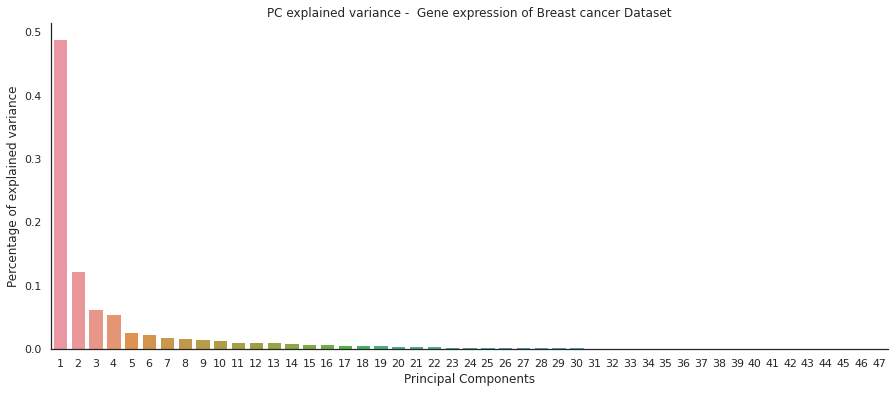

In [24]:
## Plot the explained_variance_ratio_, also i change the size of the figure 
## all the PCAs to fit

fig = plt.figure(figsize =( 15,6))
sns.barplot(x=np.arange(1,48), y=pca.explained_variance_ratio_)


plt.title("PC explained variance -  Gene expression of Breast cancer Dataset")
plt.xlabel("Principal Components")
plt.ylabel("Percentage of explained variance")
sns.despine()

In [25]:
## i apply a dimensionality reduction to PCA transformed data, put in a dataframe
## and plot them to see if the PCAS help segregate the data
reduce_bc = pca.transform(data_bc)

reduce_bc = pd.DataFrame(reduce_bc)

reduce_bc

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,9.264688,2.231807,0.964991,-2.131075,-0.098354,1.069809,0.605815,-1.029693,0.544319,-0.256190,...,-0.613299,-0.346789,-0.098423,0.918352,0.187434,-0.424231,0.156743,-0.088714,-0.202160,-0.154234
1,7.794874,0.732082,-1.141297,1.332433,1.271122,0.469944,0.632577,0.010944,1.241624,0.794444,...,0.112297,-0.178576,0.156716,0.311776,0.244172,-0.332960,0.425786,0.150019,0.444819,-0.158334
2,8.005062,-2.458199,-2.821219,2.396689,0.219696,-0.285557,0.371973,0.374003,0.672532,-0.350341,...,0.278819,0.096526,0.043821,-0.194599,-0.241069,-0.097057,-0.176216,0.200189,0.491736,0.039126
3,8.321142,-1.284390,-1.042043,-1.083681,0.406203,2.204460,0.271024,0.556414,1.756337,0.963701,...,0.047878,-0.073659,0.274866,0.107674,-0.535071,-0.246774,-0.015794,0.056308,0.117882,-0.140260
4,3.576266,-2.089123,-2.808648,6.931476,-0.344832,0.817378,-1.408007,2.899480,-1.895153,-0.263459,...,-0.075022,0.099727,0.060081,-0.103643,0.188989,-0.066659,-0.593408,0.010863,-0.545634,0.032241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,1.133602,7.964754,1.929736,-1.109872,0.686706,-1.740159,0.140004,0.273140,1.161577,-1.165051,...,0.267394,-0.035141,0.067141,-0.059744,-0.130458,0.089120,-0.047592,-0.097969,-0.108243,0.046450
641,3.170828,3.248832,1.500530,-2.643236,-0.104649,-0.186207,0.489494,-0.155189,0.220720,-2.072617,...,0.136534,-0.339486,0.761996,-0.060017,0.062107,-0.054606,-0.065017,-0.174109,0.156648,-0.196188
642,1.586072,7.394928,2.972734,-0.559862,0.858476,0.258948,-0.693968,0.115288,0.101900,0.336974,...,0.300516,0.158151,0.150882,-0.169768,-0.117347,-0.126480,-0.024956,0.077154,0.008530,0.059293
643,1.245953,3.402544,4.942678,0.988805,-0.494954,0.737549,-0.327824,0.902547,0.177132,-1.832936,...,-0.157228,-0.229889,0.500201,-0.023648,0.241192,0.192034,0.033169,-0.055623,0.028116,-0.193674


<Figure size 1080x432 with 0 Axes>

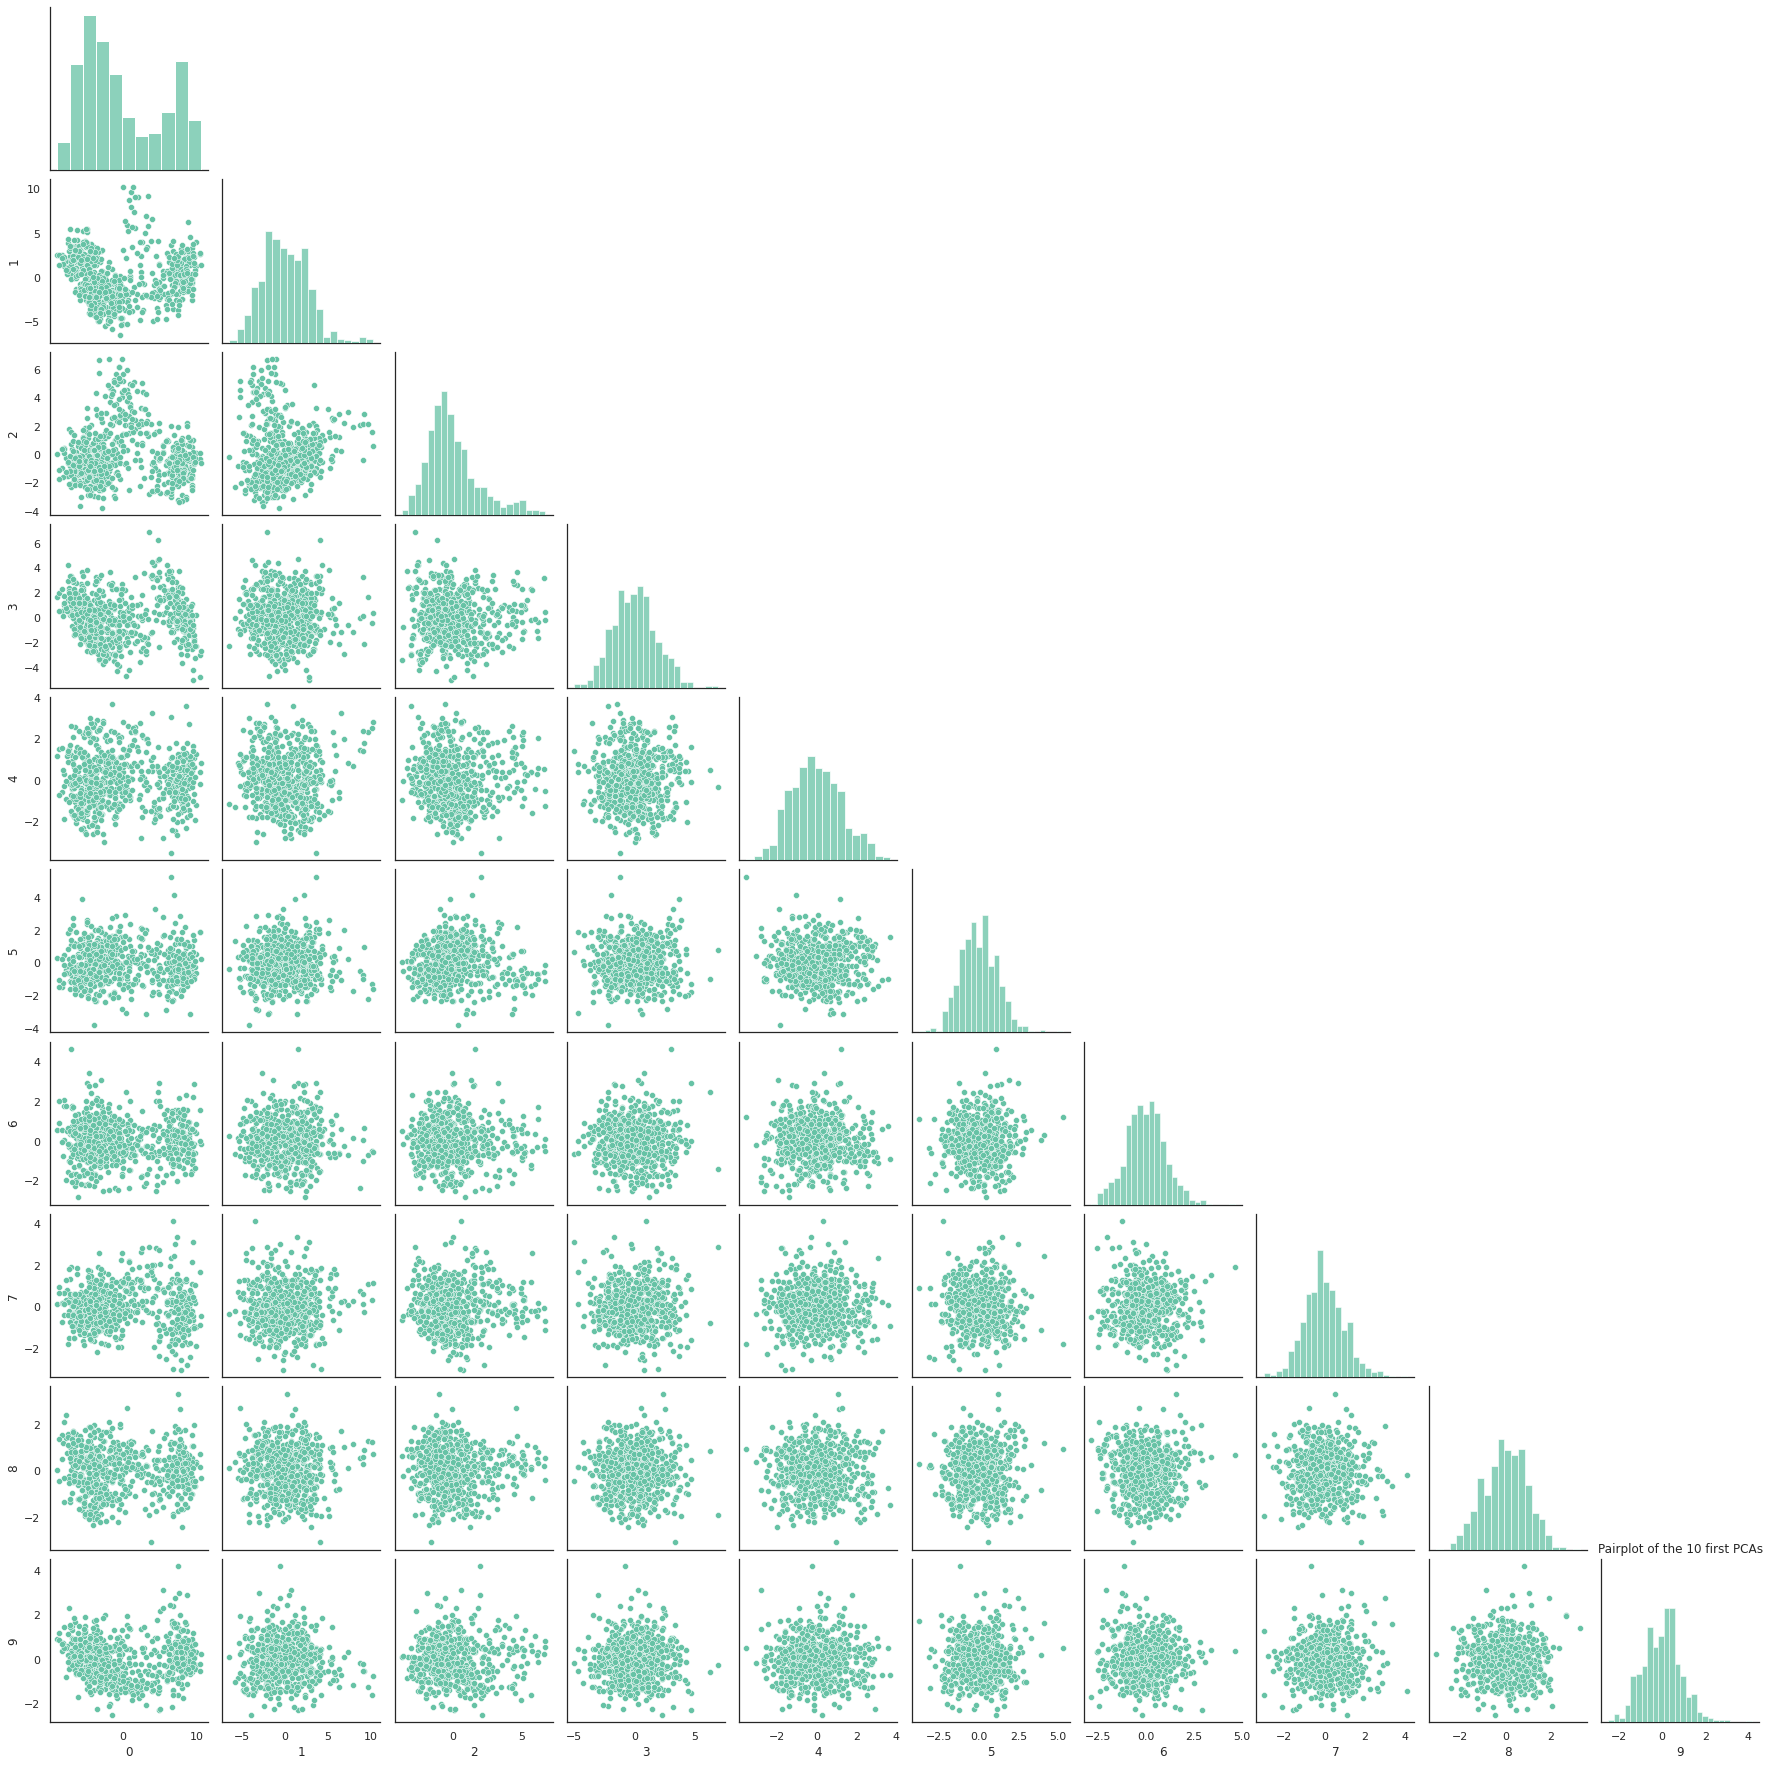

In [33]:
## Do a pairplot of the 10 first PCAs
X = reduce_bc.iloc[:, 0:10]
fig = plt.figure(figsize =( 15,6))

sns.pairplot(X, corner=True)

plt.title("Pairplot of the 10 first PCAs")
plt.xlabel("Principal Components")
plt.ylabel("Principal Component")
sns.despine()

In [ ]:
# from this result it looks like PCA 1 and PCA 3 when plotted help discriminates 
# between 3 clusters. Hypothesis : k =3

In [34]:
## calculation of k means and setting K = 3 as suggest my pairplot results
k = 3
kmeans = sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)

/soft/bioinfo/linux_RH7/python-3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<Figure size 1080x432 with 0 Axes>

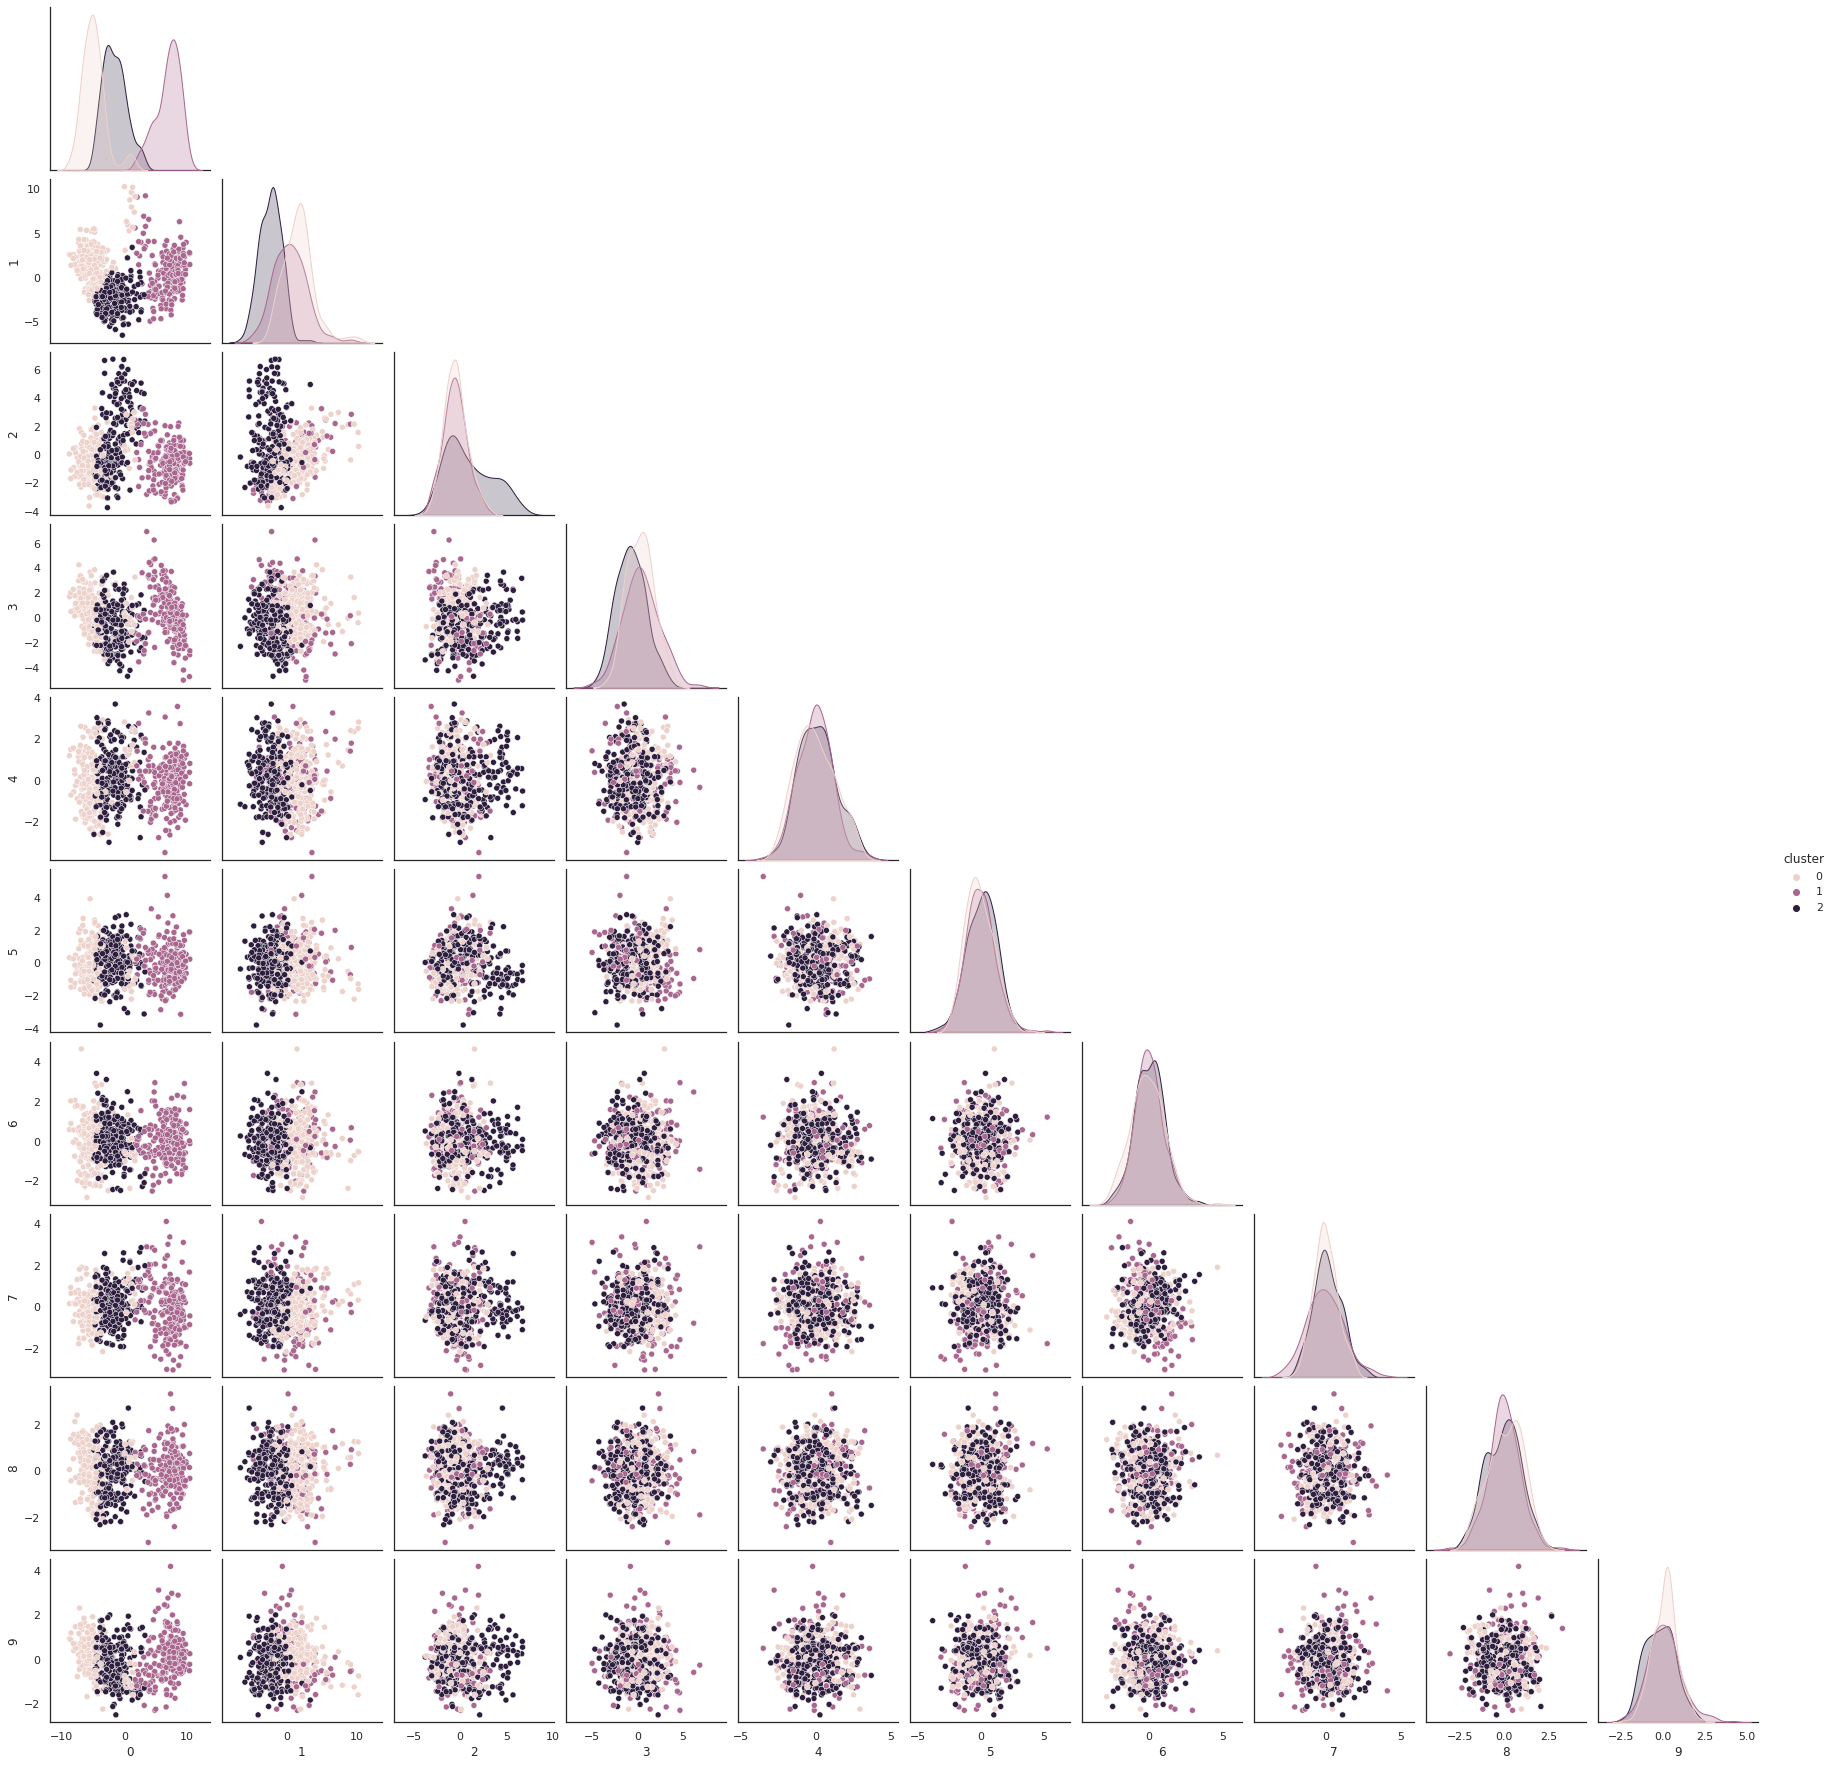

In [44]:
## Pairplot of the PCAs and the calculated clusters

X = reduce_bc.iloc[:, 0:10]

X["cluster"]=kmeans.labels_

fig = plt.figure(figsize =( 15,6))

sns.pairplot(X, hue="cluster", corner=True)

sns.despine()


In [56]:
#now it will calculate the best number of K using inertia

### Run kmeans for various k values
### initiate empty list
inertia_list = []

### Create for loop for K from 1 to 10
X = reduce_bc.iloc[:, 0:10]

for k in range(1,11):
    kmeans = sklearn.cluster.KMeans(k)
    kmeans = kmeans.fit(X)
    
    
    inertia_list += [kmeans.inertia_] #var += val means <=> var = var+val



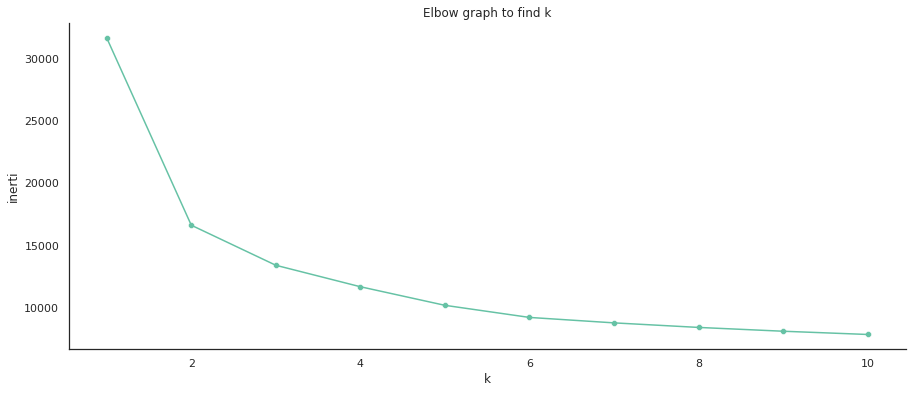

In [57]:
### Plot the elbow graph
fig = plt.figure(figsize =( 15,6))

sns.scatterplot(x=np.arange(1,11), y=inertia_list)
sns.lineplot(x=np.arange(1,11), y=inertia_list)
plt.title("Elbow graph to find k")
plt.xlabel("k")
plt.ylabel("inerti")

sns.despine()
## here 6 clusters seams adequate

<Figure size 1080x432 with 0 Axes>

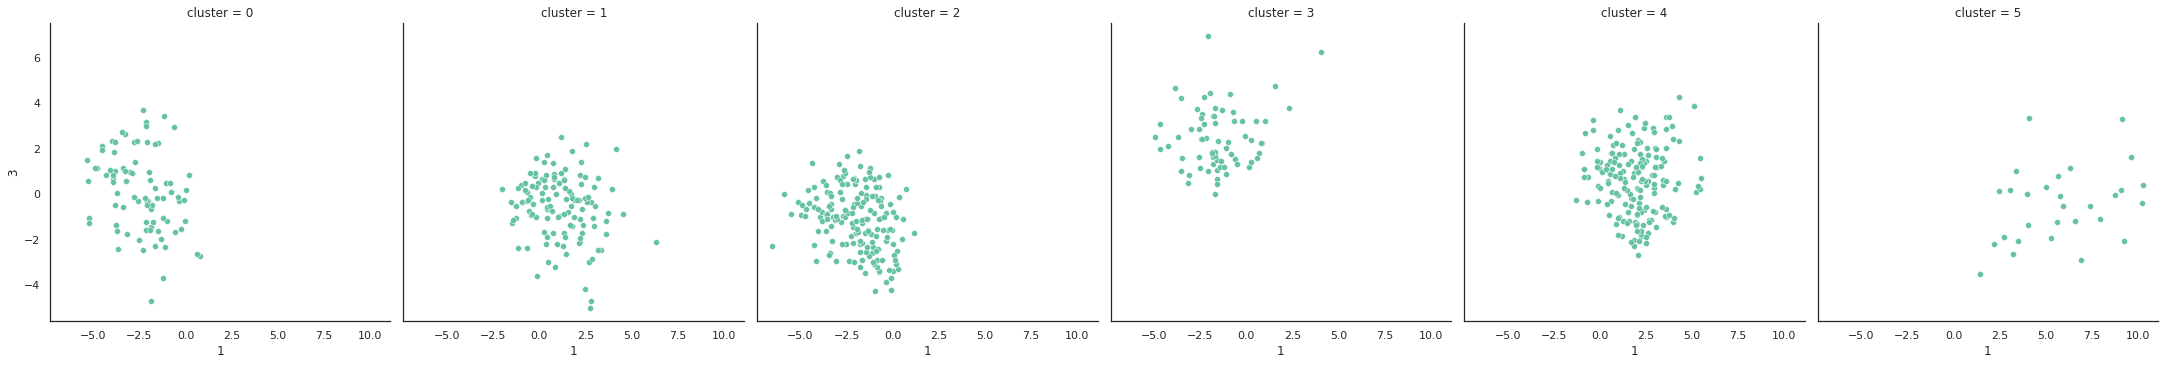

In [94]:
# k = 6 could be a good number of clusters. So i will try the 6 clusters on PCA1 
# PCA 3. I choose those PCAs because they had a lot of variance



k=6

### Apply kmeans to our data
kmeans = sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)
reduce_bc["cluster"]=kmeans.labels_


### Plot the cluster 
fig = plt.figure(figsize =( 15,6))

sns.relplot(data=reduce_bc, x=1, y=3, col="cluster")
sns.despine()


In [95]:
#The 6 calculated clusters with kmean seems to cluster the data
#but the 6th cluster (cluster = 5) looks too parse. So maybe this result suggest
#that there's 5 subtypes instead of 6.

<hr>

### Part 2 [20 points]

After doing some reasearch in the online public database where you collected the patient expression data, you were able to extract a list of breast cancer subtype assossiated to each of your patient.

Upload the <code>breast_cancer_subtype</code> data and incorporate it to your expression data. Having this new information, re-do your clustering analysis.

Are you able to link each found cluster to a cancer subtype?

In [84]:
#importing the dataset and exploring it
data_st = pd.read_csv("breast_cancer_subtype.tsv", sep="\t", header =None)
print(data_st.shape)
print(data_bc.shape)

(645, 1)
(645, 48)


In [99]:
#addind the subtype column to the expression dataset
data_bc["subtype"]= data_st.iloc[:,0]
data_bc

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799,Normal
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657,Normal
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375,Normal
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823,Normal


In [88]:
#looking for the different type of subtypes :
data_bc["subtype"].unique()

# first observation : there is 5 subtypes.  Which don't completely concordates
#with the 6 clusters suggested by the elbow graph

array(['Basal', 'LumA', 'LumB', 'Her2', 'Normal'], dtype=object)

<Figure size 1080x432 with 0 Axes>

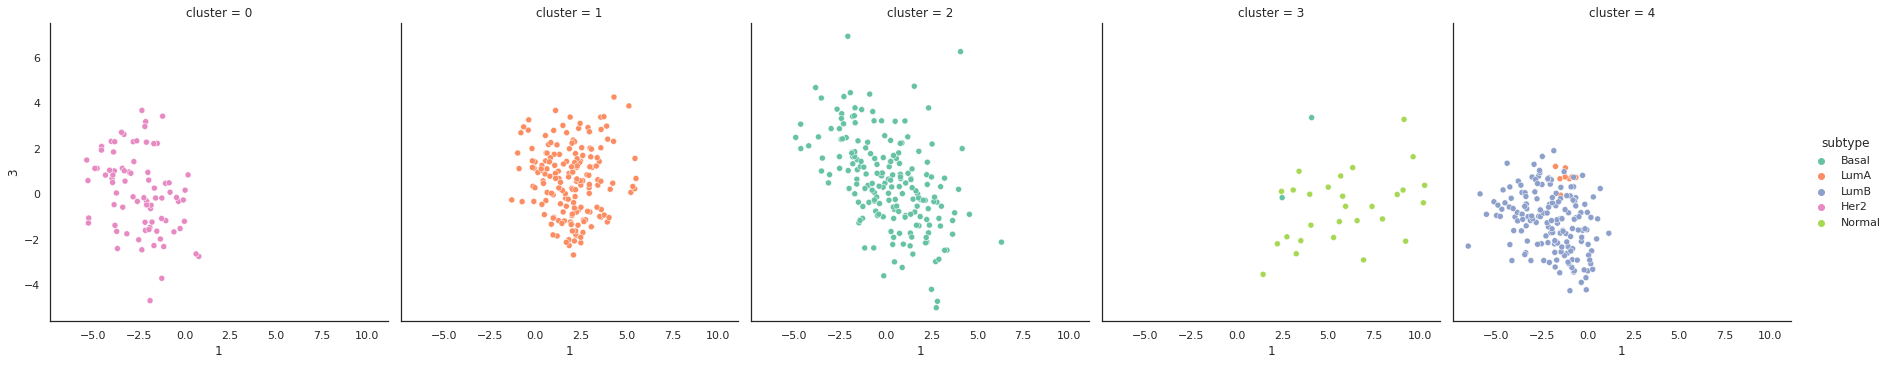

In [100]:
#trying the 5 clusters on PCA1 and PCA2 and look if it correlates with subtypes

X = reduce_bc.iloc[:, 0:10]

k=5

### Apply kmeans to our data
kmeans = sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)
reduce_bc["cluster"]=kmeans.labels_


### Plot the cluster 
fig = plt.figure(figsize =( 15,6))

sns.relplot(data=reduce_bc, x=1, y=3, col="cluster", hue = "subtype")
sns.despine()



In [ ]:
#the clusters concordates with the subtypes, which is what was expected. 
#For the cluster 5 there's a small overlap of Lum A and Lum B. 

<hr>

### Part 3 [10 points]

Go back the pair(s) of genes with high linear correlation. Do their expressions differ from one to subtype to another? If so, how?

<hr>

### Part 4 [10 points]

For each cancer subtype, identify the most expressed gene (on average). Do you find a different gene for each cluster?

If you do a rapid literrature search, are the identified genes known to be link to their respective subtype?

<hr style="border:1px solid black"> </hr>

## Share your work [5 points]

You are almost done!!

Once you are done with the exercices and are happy with your results, **push your Notebook to your GitHub account**.

Make sure that you've saved you Notebook before your final commit and push!

You last commit/push needs to be dated before **July 16th, 1:00 PM**.

Finally, **submit the URL to your GitHub account (https://github.com/HANDLE) to StudiUM.**

<hr style="border:1px solid black"> </hr>

# Good Job!

Yeah! You've just finish the last assignment for the Data Science & Data Analysis bloc of BIM6065: Congratulations 🎉

You guys did an amazing job over the last two weeks: you should be proud of yourselves!

I wish you the very best in your Master!